# Paper Figures

In [20]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
#install.packages("caret")
library(tidyr)
library(dplyr)
library(ggplot2)
library(caret)

# load the data
results <- read.csv("experiment_results.csv", header = TRUE, sep = ",")

## Sanity the check the data

In [71]:
nrow(results)

[1] 937

In [72]:
results  %>% group_by(name, slide)  %>% summarise(n=n())  %>%  filter(n>1)
results = results  %>% mutate(gt = 1-gt)  %>% 
mutate(unasst_pred = 1-unasst_pred)  %>% 
mutate(asst_pred = 1-asst_pred)

name,slide,n
<fct>,<fct>,<int>
GI Specialist 1,slide0.1,2
GI Specialist 1,slide0.3,2
GI Specialist 2,slide0.1,2
None-GI Specialist 1,slide0.1,2
None-GI Specialist 1,slide0.2,2
None-GI Specialist 1,slide0.3,2
None-GI Specialist 1,slide0.4,2
None-GI Specialist 2,slide0.1,2
None-GI Specialist 2,slide0.2,2


In [0]:
results_cleaned  = results %>% drop_na()  %>%  filter(!grepl("slide0", slide)) 

In [74]:
results_cleaned  %>% group_by(participant, name)  %>% summarise(n=n())  %>%  filter(n>40)

results= results_cleaned

participant,name,n
<fct>,<fct>,<int>


In [0]:
rearranged_results = rbind(
select(results_cleaned, slide, unasst_pred, gt, name, type, CHOL) %>%
mutate('mode' = 0)  %>% 
rename( pred= unasst_pred ),
select(results_cleaned, slide, asst_pred, gt, name, type, CHOL) %>%
mutate('mode' = 1)  %>% 
rename(pred = asst_pred)
)

In [0]:
rearranged_results = droplevels(rearranged_results)

In [77]:
head(rearranged_results)

,slide,pred,gt,name,type,CHOL,mode
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,slide1.1,0,1,None-GI Specialist 2,Non-GI Specialist,0.78417829,0
2,slide1.10,1,1,None-GI Specialist 2,Non-GI Specialist,0.94298992,0
3,slide1.2,0,0,None-GI Specialist 2,Non-GI Specialist,0.99791996,0
4,slide1.3,0,1,None-GI Specialist 2,Non-GI Specialist,0.04323179,0
5,slide1.4,0,0,None-GI Specialist 2,Non-GI Specialist,0.05789030,0
6,slide1.5,0,0,None-GI Specialist 2,Non-GI Specialist,0.06280911,0


In [0]:
# Save data for the mixed models
write.csv(rearranged_results, "mixed_model_data.csv")

## Accuracy

In [0]:
data = rearranged_results   %>% 
mutate(model_pred = if_else(CHOL > .5, 1, 0))  %>% 
group_by(name, mode)  %>% 
summarise(incorrect = sum(abs(pred - gt)), total=n(), type=first(type), model_incorrect =sum(abs(model_pred - gt)))  %>% 
mutate(score = (total - incorrect)/total, model_score =  (total - model_incorrect)/total)  %>% 
spread(mode, score, sep='_', fill=-1 ) %>% 
group_by(name)  %>% 
summarise('assisted' = max(mode_1), 'unassisted'= max(mode_0), 'type'=first(type), 'model'=first(model_score))

In [80]:
data

name,assisted,unassisted,type,model
<fct>,<dbl>,<dbl>,<fct>,<dbl>
GI Specialist 1,0.9375,0.9250,GI Specialist,0.8750
GI Specialist 2,0.9750,0.9375,GI Specialist,0.9125
GI Specialist 3,0.9750,0.9750,GI Specialist,0.9125
None-GI Specialist 1,0.8500,0.8375,Non-GI Specialist,0.8125
None-GI Specialist 2,0.8500,0.8125,Non-GI Specialist,0.8000
None-GI Specialist 3,0.9125,0.8750,Non-GI Specialist,0.8125
Pathologist NOC 1,0.9500,0.9875,Pathologist NOC,0.8000
Pathologist NOC 2,0.9125,0.9500,Pathologist NOC,0.8625
Trainee 1,0.7875,0.7125,Trainee,0.7750


In [0]:
data = data  %>% mutate(type_order = if_else(type == 'GI Specialist', 1, if_else(type == 'Non-GI Specialist', 2, if_else(type == 'Pathologist NOC', 0, 3))))
data = arrange(data, desc(type_order))  %>% 
mutate(row_idx = row_number())

In [82]:
data

name,assisted,unassisted,type,model,type_order,row_idx
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>
Trainee 1,0.7875,0.7125,Trainee,0.7750,3,1
Trainee 2,0.9750,0.9375,Trainee,0.9000,3,2
Trainee 3,0.9250,0.9250,Trainee,0.8000,3,3
None-GI Specialist 1,0.8500,0.8375,Non-GI Specialist,0.8125,2,4
None-GI Specialist 2,0.8500,0.8125,Non-GI Specialist,0.8000,2,5
None-GI Specialist 3,0.9125,0.8750,Non-GI Specialist,0.8125,2,6
GI Specialist 1,0.9375,0.9250,GI Specialist,0.8750,1,7
GI Specialist 2,0.9750,0.9375,GI Specialist,0.9125,1,8
GI Specialist 3,0.9750,0.9750,GI Specialist,0.9125,1,9


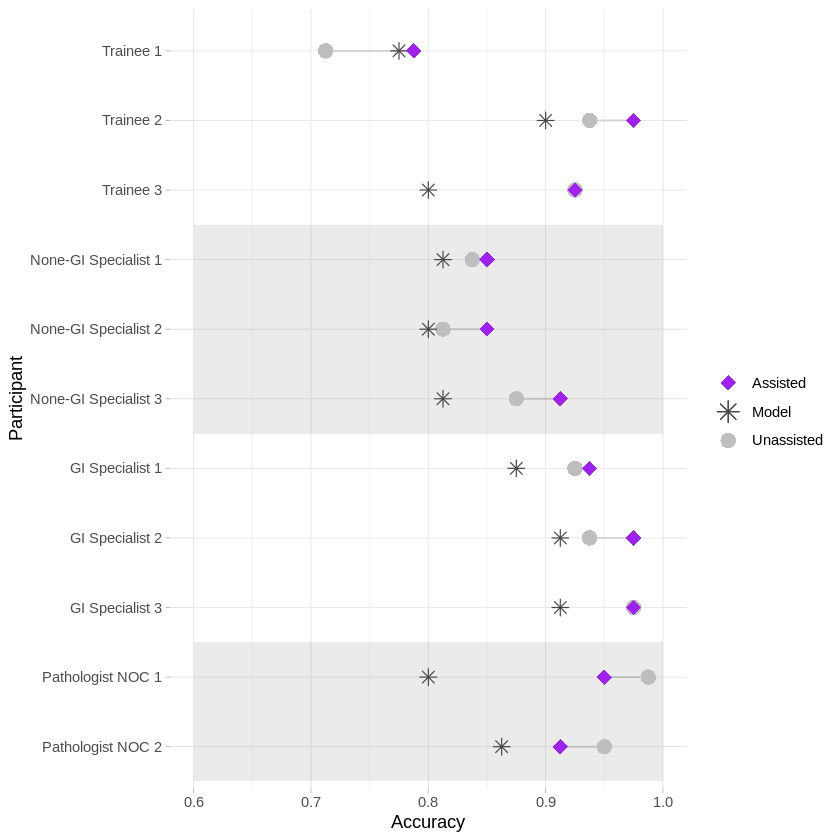

In [83]:
write.csv(data, "assisted_unassisted_accuracy.csv")
shape_cols <- c("Model"=8, "Unassisted"=16, "Assisted"=18)
color_cols <- c("Model"="#444444", "Unassisted"="gray", "Assisted"="purple", "white" = "white", "black"= "gray")
data = data  %>% mutate(type_color = if_else(type_order %% 2 != 0, "white", "black"))

# With a bit more style
graph = ggplot(data) +
  geom_segment(aes(x=reorder(name, -row_idx), xend=reorder(name, -row_idx), y=unassisted, yend=assisted), color='gray') +
  geom_rect(mapping=aes(xmin= 12 - row_idx - .5, xmax=(12 - row_idx) +  .5, ymin=.6, ymax=1., fill=type_color), alpha=.3, ) +
  geom_point(aes(x=reorder(name,-row_idx), y=unassisted, shape="Unassisted", color="Unassisted"),  size=4) +
  geom_point(aes(x=reorder(name,-row_idx), y=model, shape="Model", color="Model"),show.legend = F, size=3) +
  geom_point(aes(x=reorder(name, -row_idx), y=assisted, shape="Assisted",  color="Assisted"), size =4) +
  coord_flip()+
  theme_light() +
  theme(
    legend.position = "right",
    panel.border = element_blank()) + 
  scale_shape_manual(name="",values=shape_cols) +
  scale_color_manual(name="",values=color_cols) +
  scale_fill_manual(name="",values=color_cols, guide=FALSE) +
  xlab("Participant") +
  ylab("Accuracy") +
  ylim(.6, 1.0)

graph

In [84]:
ggsave("assisted_unassisted_model_accuracy.pdf", graph)

Saving 6.67 x 6.67 in image



## Sensitivity/Specificity

In [0]:
results_stats <- data.frame(matrix(ncol = 8))
x <- c("name", "model_specificity", "model_sensitivity", "assisted_specificity", "unassisted_specificity", "unassisted_sensitivity", "assisted_sensitivity", "type")
results = mutate(results, model_pred = if_else(CHOL>.5, 1, 0))
colnames(results_stats) <- x

for (p_name in unique(results$name)){
    participant_data = filter(results, name == p_name)  %>% mutate_if(is.factor, as.character)
    
    type = first(participant_data$type)
    
    model_sens = round(sensitivity(factor(participant_data$model_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
    model_spec = round(specificity(factor(participant_data$model_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
    
    unasst_sens = round(sensitivity(factor(participant_data$unasst_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
    unasst_spec = round(specificity(factor(participant_data$unasst_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
    
    asst_sens = round(sensitivity(factor(participant_data$asst_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
    asst_spec = round(specificity(factor(participant_data$asst_pred, levels = c("1", "0")), factor(participant_data$gt,levels = c("1", "0"))), 2)

    results_stats = rbind(results_stats, c(name=p_name, 
                                           model_specificity=model_spec, 
                                           model_sensitivity=model_sens,
                                           assisted_specificity=asst_spec, 
                                           unassisted_specificity=unasst_spec, 
                                           unassisted_sensitivity=unasst_sens, 
                                           assisted_sensitivity=asst_sens, 
                                           type=type))
}

results_stats = results_stats  %>%  slice(2:n())

In [0]:
asst_sens = round(sensitivity(factor(participant_data$asst_pred, levels = c("1", "0")), factor(participant_data$gt, levels = c("1", "0"))), 2)
asst_spec = round(specificity(factor(participant_data$asst_pred, levels = c("1", "0")), factor(participant_data$gt,levels = c("1", "0"))), 2)


In [87]:
results_stats

name,model_specificity,model_sensitivity,assisted_specificity,unassisted_specificity,unassisted_sensitivity,assisted_sensitivity,type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
None-GI Specialist 2,0.82,0.78,0.95,0.98,0.65,0.75,Non-GI Specialist
None-GI Specialist 3,0.82,0.8,0.98,0.98,0.78,0.85,Non-GI Specialist
Pathologist NOC 1,0.82,0.78,0.98,1,0.98,0.92,Pathologist NOC
Trainee 1,0.8,0.75,0.88,0.72,0.7,0.7,Trainee
Pathologist NOC 2,0.92,0.8,0.95,1,0.9,0.88,Pathologist NOC
GI Specialist 1,0.85,0.9,1,1,0.85,0.88,GI Specialist
Trainee 3,0.8,0.8,0.92,0.9,0.95,0.92,Trainee
None-GI Specialist 1,0.85,0.78,0.75,0.72,0.95,0.95,Non-GI Specialist
GI Specialist 2,0.92,0.9,1,1,0.88,0.95,GI Specialist


In [88]:
cols.num <- c("model_specificity", "model_sensitivity", "assisted_specificity", "unassisted_specificity", "unassisted_sensitivity", "assisted_sensitivity")
results_stats[cols.num] <- sapply(results_stats[cols.num],as.numeric)
glimpse(results_stats)

Observations: 11
Variables: 8
$ name                   <chr> "None-GI Specialist 2", "None-GI Specialist 3"…
$ model_specificity      <dbl> 0.82, 0.82, 0.82, 0.80, 0.92, 0.85, 0.80, 0.85…
$ model_sensitivity      <dbl> 0.78, 0.80, 0.78, 0.75, 0.80, 0.90, 0.80, 0.78…
$ assisted_specificity   <dbl> 0.95, 0.98, 0.98, 0.88, 0.95, 1.00, 0.92, 0.75…
$ unassisted_specificity <dbl> 0.98, 0.98, 1.00, 0.72, 1.00, 1.00, 0.90, 0.72…
$ unassisted_sensitivity <dbl> 0.65, 0.78, 0.98, 0.70, 0.90, 0.85, 0.95, 0.95…
$ assisted_sensitivity   <dbl> 0.75, 0.85, 0.92, 0.70, 0.88, 0.88, 0.92, 0.95…
$ type                   <chr> "Non-GI Specialist", "Non-GI Specialist", "Pat…


In [0]:
data = results_stats

In [0]:
data = data  %>% mutate(type_order = if_else(type == 'GI Specialist', 1, if_else(type == 'Non-GI Specialist', 2, if_else(type == 'Pathologist NOC', 0, 3))))
data = arrange(data, desc(type_order), name)  %>% 
ungroup()  %>% mutate(row_idx = row_number())

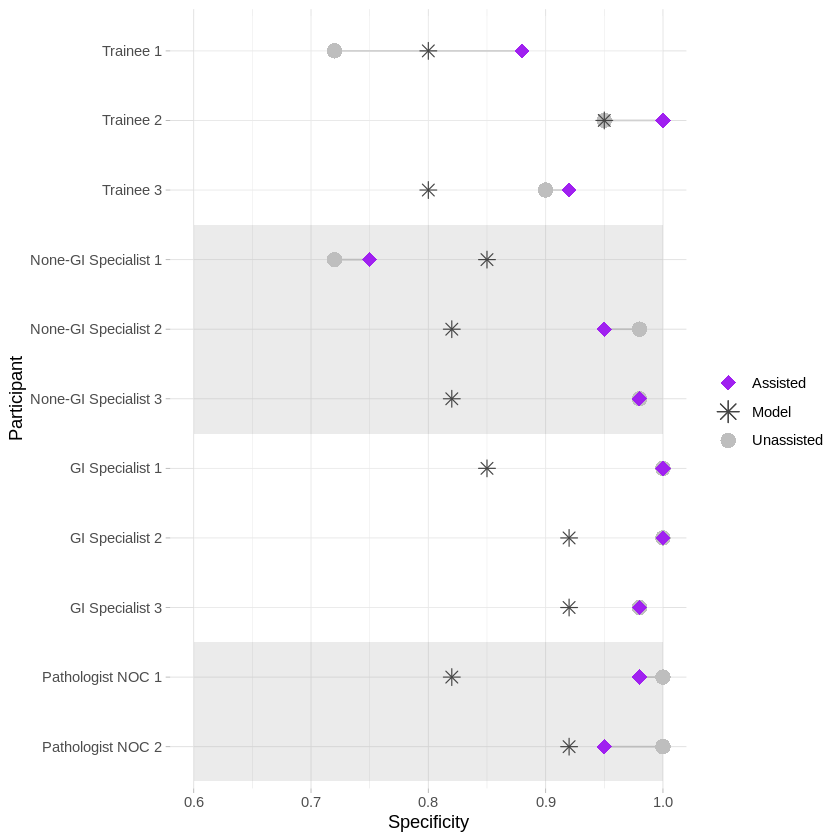

In [92]:
write.csv(data, "assisted_unassisted_specificity_sensitivity.csv")

shape_cols <- c("Model"=8, "Unassisted"=16, "Assisted"=18)
color_cols <- c("Model"="#444444", "Unassisted"="gray", "Assisted"="purple", "white" = "white", "black"= "gray")

data = data  %>% mutate(type_color = if_else(type_order %% 2 != 0, "white", "black"))

# With a bit more style
graph = ggplot(data) +
  geom_segment(aes(x=reorder(name, -row_idx), xend=reorder(name, -row_idx), y=unassisted_specificity, yend=assisted_specificity), color='gray') +
  geom_rect(mapping=aes(xmin= 12 - row_idx - .5, xmax=(12 - row_idx) +  .5, ymin=.6, ymax=1., fill=type_color), alpha=.3, ) +
  geom_point(aes(x=reorder(name,-row_idx), y=unassisted_specificity, shape="Unassisted", color="Unassisted"),  size=4) +
  geom_point(aes(x=reorder(name,-row_idx), y=model_specificity, shape="Model", color="Model"),show.legend = F, size=3) +
  geom_point(aes(x=reorder(name, -row_idx), y=assisted_specificity, shape="Assisted",  color="Assisted"), size =4) +
  coord_flip()+
  theme_light() +
  theme(
    legend.position = "right",
    panel.border = element_blank()) + 
  scale_shape_manual(name="",values=shape_cols) +
  scale_color_manual(name="",values=color_cols) +
  scale_fill_manual(name="",values=color_cols, guide=FALSE) +
  xlab("Participant") +
  ylab("Specificity") +
  ylim(.6, 1.0)

graph


In [93]:
ggsave("assisted_unassisted_specificity.pdf", graph)

Saving 6.67 x 6.67 in image



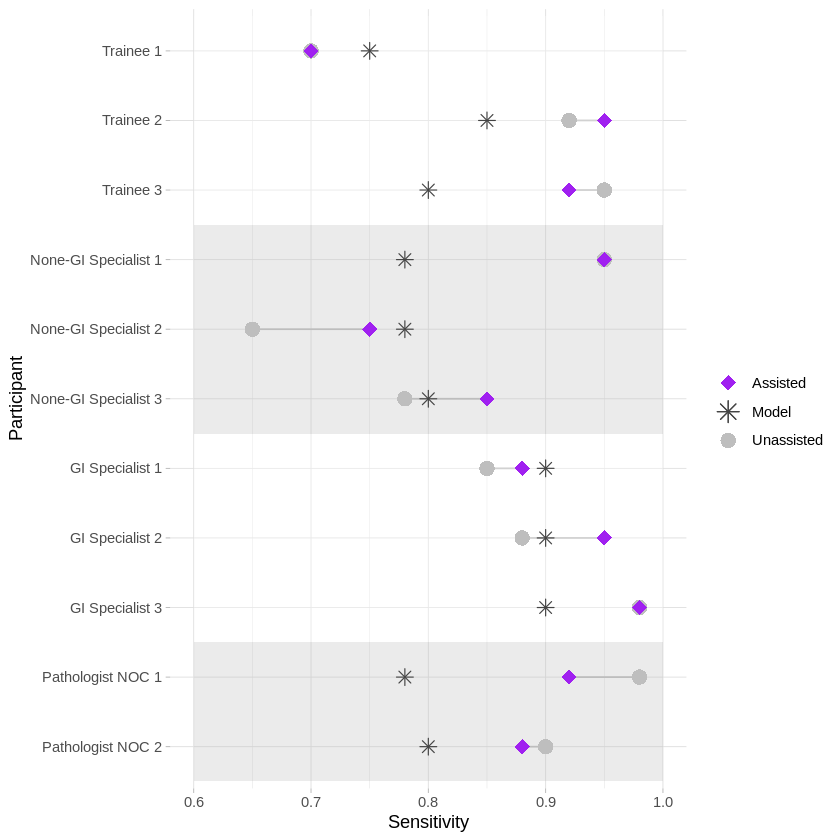

In [94]:
shape_cols <- c("Model"=8, "Unassisted"=16, "Assisted"=18)
color_cols <- c("Model"="#444444", "Unassisted"="gray", "Assisted"="purple", "white" = "white", "black"= "gray")
data = data  %>% mutate(type_color = if_else(type_order %% 2 != 0, "white", "black"))

# With a bit more style
graph = ggplot(data) +
  geom_segment(aes(x=reorder(name, -row_idx), xend=reorder(name, -row_idx), y=unassisted_sensitivity, yend=assisted_sensitivity), color='gray') +
  geom_rect(mapping=aes(xmin= 12 - row_idx - .5, xmax=(12 - row_idx) +  .5, ymin=.6, ymax=1., fill=type_color), alpha=.3, ) +
  geom_point(aes(x=reorder(name,-row_idx), y=unassisted_sensitivity, shape="Unassisted", color="Unassisted"),  size=4) +
  geom_point(aes(x=reorder(name,-row_idx), y=model_sensitivity, shape="Model", color="Model"),show.legend = F, size=3) +
  geom_point(aes(x=reorder(name, -row_idx), y=assisted_sensitivity, shape="Assisted",  color="Assisted"), size =4) +
  coord_flip()+
  theme_light() +
  theme(
    legend.position = "right",
    panel.border = element_blank()) + 
  scale_shape_manual(name="",values=shape_cols) +
  scale_color_manual(name="",values=color_cols) +
  scale_fill_manual(name="",values=color_cols, guide=FALSE) +
  xlab("Participant") +
  ylab("Sensitivity") +
  ylim(.6, 1.0)

graph


In [95]:
ggsave("assisted_unassisted_model_sensitivity.pdf", graph)

Saving 6.67 x 6.67 in image

